importing libraries



In [28]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [29]:
#initialize plotly
import plotly.io as pio
pio.renderers.default='colab'

importing dataset

In [30]:
df=pd.read_csv('TSLA.csv')

In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-08,15.630000,15.986667,15.510000,15.886667,15.886667,79114500
1,2019-08-09,15.736667,15.930667,15.587333,15.667333,15.667333,58473000
2,2019-08-12,15.532667,15.718000,15.250000,15.267333,15.267333,69958500
3,2019-08-13,15.254000,15.733333,15.170000,15.666667,15.666667,72721500
4,2019-08-14,15.414000,15.433333,14.446000,14.641333,14.641333,143439000
...,...,...,...,...,...,...,...
1253,2024-08-01,227.690002,231.869995,214.330002,216.860001,216.860001,83861900
1254,2024-08-02,214.880005,216.130005,205.779999,207.669998,207.669998,82880100
1255,2024-08-05,185.220001,203.880005,182.000000,198.880005,198.880005,100308800
1256,2024-08-06,200.750000,202.899994,192.669998,200.639999,200.639999,73783900


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,192.091351,196.403230,187.489358,192.032043,192.032043,1.284992e+08
std,92.932293,94.878167,90.694652,92.764588,92.764588,8.306215e+07
min,14.240000,14.334667,14.066667,14.093333,14.093333,2.940180e+07
25%,140.954163,144.409996,137.732502,140.945835,140.945835,7.783598e+07
50%,208.290001,213.209999,203.010002,207.800003,207.800003,1.043750e+08
75%,252.313332,257.992500,246.860005,252.487495,252.487495,1.488498e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


data visualisation

In [34]:
px.area(df,x='Date',y='Close')

In [35]:
px.line(df,x='Date',y='Close')

In [36]:
px.area(df,x='Date',y='Volume')

In [37]:
px.bar(df,y='Volume')

In [38]:
px.box(df,y='Close')

data preperation

In [39]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)

In [40]:
ndf

,Date,Close
0,2019-08-08,15.886667
1,2019-08-09,15.667333
2,2019-08-12,15.267333
3,2019-08-13,15.666667
4,2019-08-14,14.641333
...,...,...
1253,2024-08-01,216.860001
1254,2024-08-02,207.669998
1255,2024-08-05,198.880005
1256,2024-08-06,200.639999


In [41]:
f=ndf.rename(columns={'Date':'ds','Close':'y'})

In [42]:
f

,ds,y
0,2019-08-08,15.886667
1,2019-08-09,15.667333
2,2019-08-12,15.267333
3,2019-08-13,15.666667
4,2019-08-14,14.641333
...,...,...
1253,2024-08-01,216.860001
1254,2024-08-02,207.669998
1255,2024-08-05,198.880005
1256,2024-08-06,200.639999


Creating fb prophet model

In [43]:
m=Prophet()
m.fit(f)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vb_5469/b8zm6cdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vb_5469/laxcvj38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64846', 'data', 'file=/tmp/tmp9vb_5469/b8zm6cdl.json', 'init=/tmp/tmp9vb_5469/laxcvj38.json', 'output', 'file=/tmp/tmp9vb_5469/prophet_modelmyryea9y/prophet_model-20240808094432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting

In [44]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [45]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-08,-13.677337,-54.682343,23.170500,-13.677337,-13.677337,-0.312108,-0.312108,-0.312108,-6.494814,-6.494814,-6.494814,6.182707,6.182707,6.182707,0.0,0.0,0.0,-13.989445
1,2019-08-09,-13.346685,-51.146994,25.793525,-13.346685,-13.346685,-0.384965,-0.384965,-0.384965,-6.911916,-6.911916,-6.911916,6.526951,6.526951,6.526951,0.0,0.0,0.0,-13.731650
2,2019-08-12,-12.354728,-49.937133,28.727799,-12.354728,-12.354728,2.825916,2.825916,2.825916,-4.915621,-4.915621,-4.915621,7.741537,7.741537,7.741537,0.0,0.0,0.0,-9.528812
3,2019-08-13,-12.024076,-48.867811,32.432611,-12.024076,-12.024076,2.445661,2.445661,2.445661,-5.730452,-5.730452,-5.730452,8.176113,8.176113,8.176113,0.0,0.0,0.0,-9.578415
4,2019-08-14,-11.693424,-47.060991,30.027597,-11.693424,-11.693424,3.093532,3.093532,3.093532,-5.517490,-5.517490,-5.517490,8.611022,8.611022,8.611022,0.0,0.0,0.0,-8.599892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2024-09-02,201.875787,173.041171,250.746445,201.531289,202.294192,10.078907,10.078907,10.078907,-4.915621,-4.915621,-4.915621,14.994528,14.994528,14.994528,0.0,0.0,0.0,211.954694
1284,2024-09-03,201.784935,170.016379,247.676892,201.400191,202.241214,9.713800,9.713800,9.713800,-5.730452,-5.730452,-5.730452,15.444252,15.444252,15.444252,0.0,0.0,0.0,211.498735
1285,2024-09-04,201.694082,175.822674,252.578563,201.274321,202.220305,10.403253,10.403253,10.403253,-5.517490,-5.517490,-5.517490,15.920743,15.920743,15.920743,0.0,0.0,0.0,212.097335
1286,2024-09-05,201.603230,175.593514,248.156626,201.154706,202.178816,9.923895,9.923895,9.923895,-6.494814,-6.494814,-6.494814,16.418710,16.418710,16.418710,0.0,0.0,0.0,211.527125


In [46]:
px.line(forecast,x='ds',y='yhat')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



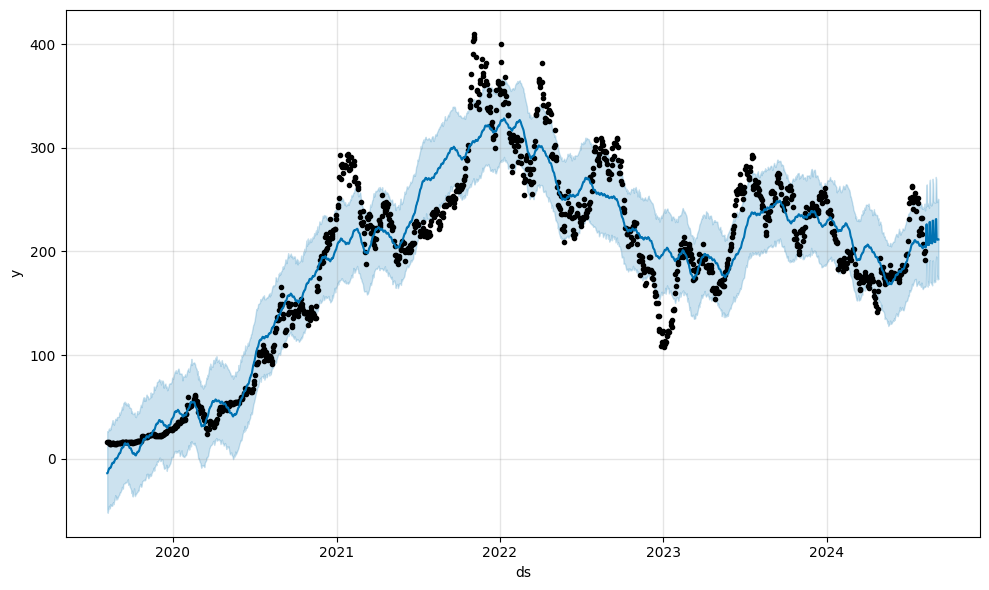

In [27]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



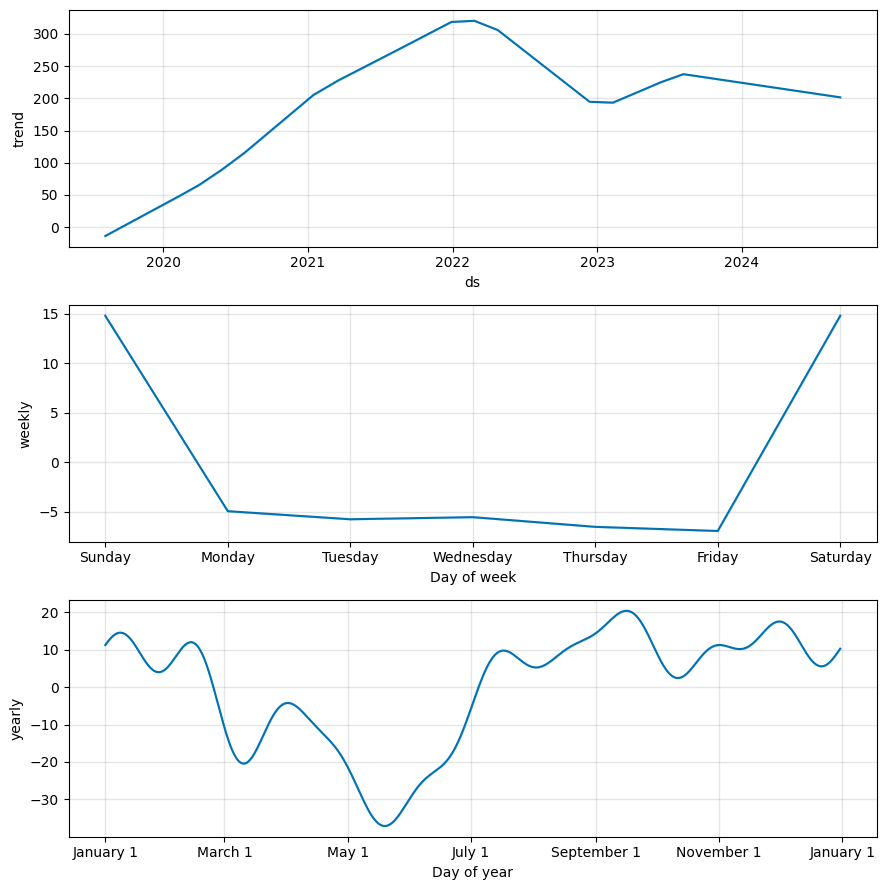

In [47]:
figure2=m.plot_components(forecast)

download forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')